# Zadanie 3.1

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving SAheart.csv to SAheart (1).csv


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('SAheart.csv')
df.head

<bound method NDFrame.head of      sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1      1  


In [ ]:
for col in df:
    print(df[col].unique())

[160 144 118 170 134 132 142 114 206 112 117 120 146 158 124 106 150 138
 145 136 122 126 148 140 110 130 128 162 116 152 156 103 121 168 108 143
 194 164 166 174 154 153 123 109 127 208 129 102 180 188 176 190 161 101
 137 198 178 218 200 216 214 182]
[1.200e+01 1.000e-02 8.000e-02 7.500e+00 1.360e+01 6.200e+00 4.050e+00
 4.080e+00 0.000e+00 6.000e+00 1.410e+01 9.650e+00 1.530e+00 1.050e+01
 2.600e+00 1.400e+01 1.610e+00 7.900e+00 3.000e-01 6.000e-01 1.820e+01
 4.000e+00 9.100e+00 4.090e+00 2.520e+00 1.020e+00 6.600e+00 8.750e+00
 5.500e+00 4.260e+00 3.900e+00 4.640e+00 1.120e+01 2.800e-01 4.000e-02
 2.610e+00 4.650e+00 7.400e+00 1.910e+00 3.800e+00 2.500e+00 9.000e-01
 8.080e+00 3.000e+00 5.990e+00 5.100e+00 3.000e-02 8.000e-01 1.150e+00
 1.010e+01 4.500e-01 7.360e+00 4.820e+00 4.100e-01 4.460e+00 1.720e+00
 5.600e+00 9.000e-02 4.000e-01 4.500e+00 8.140e+00 4.800e+00 1.220e+01
 5.600e-01 7.200e-01 1.030e+00 3.700e+00 4.600e-01 1.700e+00 2.160e+00
 3.200e+00 8.000e+00 7.000e-02 4.200e

In [ ]:
df = df.values

In [ ]:
X, y = df[:,:-1], df[:,-1]
le = LabelEncoder()
X[:,4] = le.fit_transform(X[:,4])

In [ ]:
X_pocz = le.inverse_transform(X[:,4])
X_pocz

IndexError: ignored

##a

In [ ]:
logreg = LogisticRegression(penalty = 'none',max_iter = 1000) #definiujemy model logistyczny
logreg.fit(X,y) #dopasowujemy do danych treningowych
print(logreg.coef_) #współczynniki przy zmiennych, przyporządkowywuje poszczegolnym cecha wagi
print(logreg.intercept_) #współczynnik przy wyazie wolnym

[[ 6.50486172e-03  7.93317383e-02  1.74062462e-01  1.86906587e-02
   9.24299271e-01  3.95707055e-02 -6.31141731e-02  1.24259856e-04
   4.52017204e-02]]
[-6.14599762]


##b

In [ ]:
#obliczenie wektora Xbeta dla pierwszego wiersza:
logreg.decision_function(X)[0]
#ręcznie:
np.sum(X[0,:]*logreg.coef_)+logreg.intercept_

array([0.90512292])

In [ ]:
Xb = logreg.decision_function(X)
print((np.exp(Xb)/(1+np.exp(Xb)))[0:5]) #pstwo przydziału do klasy 1
print(logreg.predict_proba(X)[0:5,1]) #pstwo przydziału do klasy 1
print((1/(1+np.exp(Xb))[0:5])) #pstwo przydziału do klasy 0
print(logreg.predict_proba(X)[0:5,0]) #pstwo przydziału do klasy 0

[0.71200113 0.33094767 0.2808147  0.71696576 0.69279614]
[0.71200113 0.33094767 0.2808147  0.71696576 0.69279614]
[0.28799887 0.66905233 0.7191853  0.28303424 0.30720386]
[0.28799887 0.66905233 0.7191853  0.28303424 0.30720386]


##c

In [ ]:
np.exp(logreg.coef_[0,-1]) #szansa w modelu logistycznym wyraża się przez p/(1-p)=exp(xb)
#teraz załóżmy, że mamy drugą obserwację x', jej szansa to p'/(1-p')=exp(x'b)
#zatem iloraz szans to p/(1-p) / p'/(1-p') = exp((x-x')b)
#u nas osoby x i x' są identyczne tyko różnią się wiekiem o 1, zatem x-x'=(0,...,0,1,0...,0)
#więc iloraz szans to exp((x-x')b) = exp(b_age)

1.0462388863556833

##d

In [ ]:
#d
print(logreg.predict_proba(np.array([[128,0,4.44,20,1,51,22,0,31]]))) #predykcja prawdopodobieństwa, widzimy, że większe dla klasy 0
print(logreg.predict(np.array([[128,0,4.44,20,1,51,22,0,31]]))) #w predict treshold jest ustawiony na 0.5, zatem 0.77>0.5 więc pzypisujemy do klasy 1

[[0.77057805 0.22942195]]
[0]


#3.2

In [ ]:
uploaded2 = files.upload()

Saving earthquake.csv to earthquake.csv


In [ ]:
df2 = pd.read_csv('earthquake.csv')

In [ ]:
df2

In [ ]:
df2
df2_raw = df2.values

In [ ]:
X = df2_raw[:,1:]
y = df2_raw[:,0]
y = LabelEncoder().fit_transform(y)

Text(0, 0.5, 'surface')

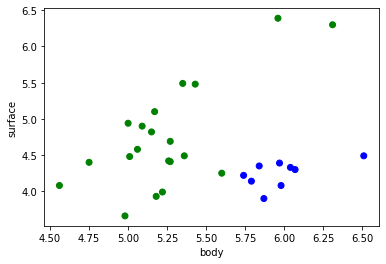

In [ ]:
#zobrazowanie - wykres rozproszenia
colormap = np.array(['green','blue'])
plt.scatter(X[:,0],X[:,1], c = colormap[y]) #mozna zauwazyc ze dane sa liniowo separowalne
plt.xlabel('body')
plt.ylabel('surface')

In [ ]:
colormap[y]

In [ ]:
colormap

In [ ]:
le = LogisticRegression(penalty = 'none', max_iter = 1000).fit(X,y)
print(le.coef_)
print(le.intercept_) 

[[ 146.40894937 -151.81204304]]
[-184.8930899]


współczynniki sa ogromne poniewaz model regresji logistycznej zle dziala na danych liniowo separowalnych, bo algorytm iteracyjny ma nieskonczenie wiele dobrych rozwiazan

In [ ]:
le2 = LogisticRegression(penalty = 'l2', max_iter = 1000)
le2.fit(X,y)
print(le2.coef_)
print(le2.intercept_)

[[ 2.16923577 -1.18171285]]
[-7.46941588]


# 3.3

In [ ]:
uploaded3 = files.upload()

Saving pima.csv to pima.csv


In [ ]:
df3 = pd.read_csv('pima.csv')

In [ ]:
for col in df3:
    print(df3[col].unique())

##a

In [ ]:
df3_raw = df3.values
df3_train, df3_test = train_test_split(df3_raw, test_size=0.3)
X_train, y_train = df3_train[:,:-1], df3_train[:,-1]
X_test, y_test = df3_train[:,:-1], df3_train[:,-1]

In [ ]:
df3.shape

(768, 9)

In [ ]:
X_train.shape

(537, 8)

##b

In [ ]:
from sklearn import tree

In [ ]:
model_tree = tree.DecisionTreeClassifier(min_samples_split = 5, random_state=123)
dtc3 = model_tree.fit(X_train, y_train)

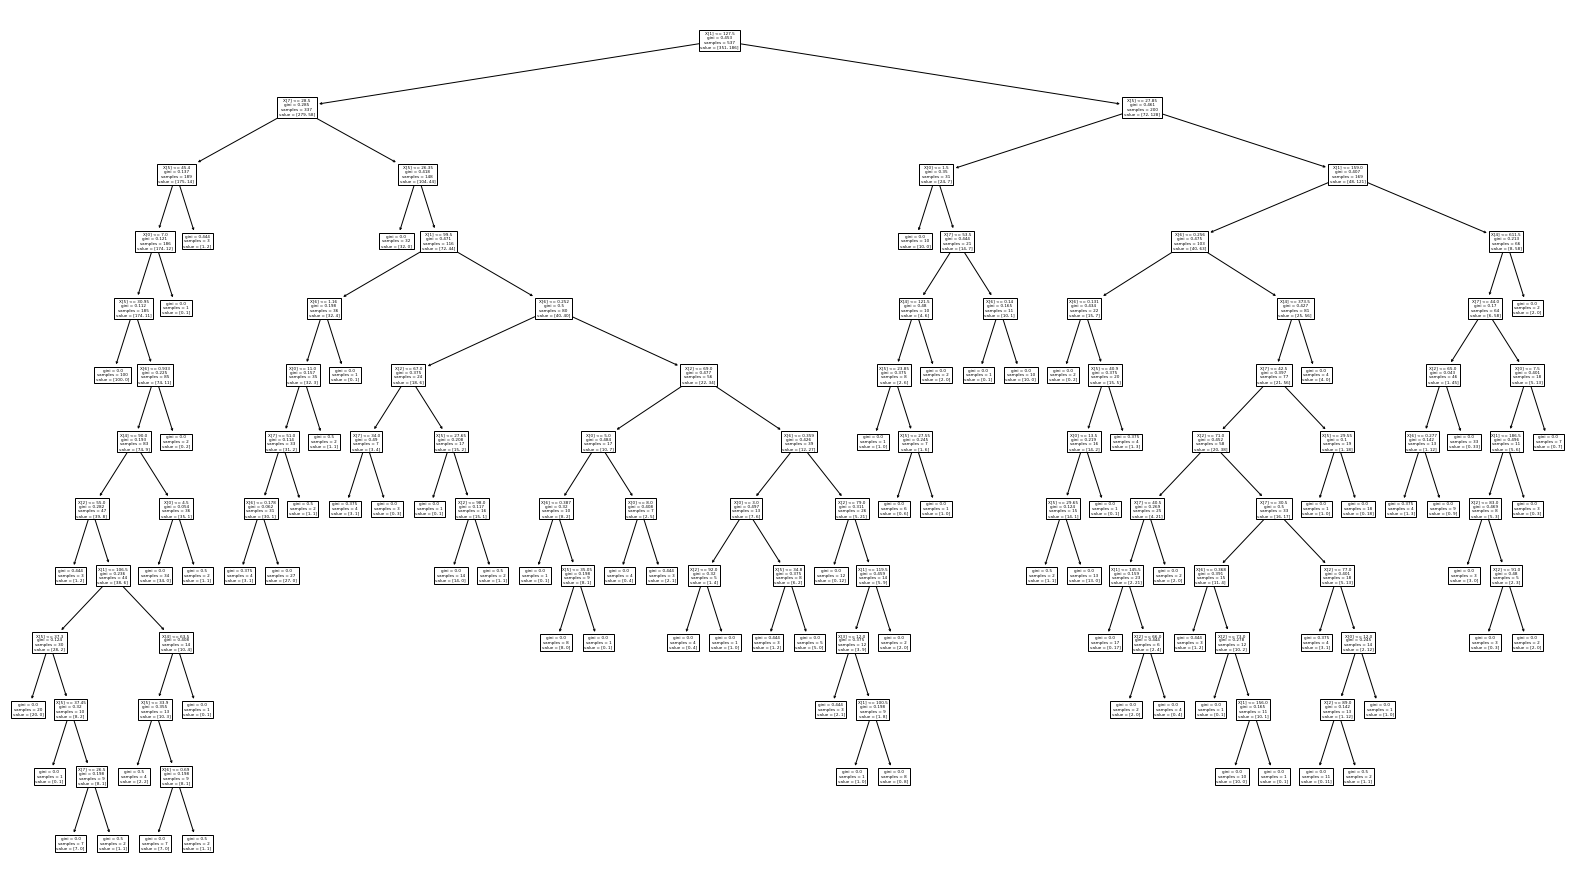

In [ ]:
plt.figure(figsize = (28,16))
tree.plot_tree(dtc3)
plt.show()

## c - model logistyczny

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(penalty = 'none', max_iter=1000)
LR_fit = LR.fit(X_train, y_train)

##d

In [ ]:
dtc3_prob = dtc3.predict_proba(X_test)
LR_fit_prob = LR_fit.predict_proba(X_test)
dtc3_prob1 = dtc3_prob[:,1]
LR_prob1 =LR_fit_prob[:,1]


In [ ]:
#predykcje prawdopodobieństw dla drzewa i regresji logistycznej
dtc3_fpr, dtc3_tpr, _ = roc_curve(y_test, dtc3_prob1) #liczymy fpr-y i tpr-y dla drzewa
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, LR_prob1) #i regresji logistycznej

##e - krzywa ROC

In [ ]:
roc_curve(y_test, LR_prob1)

(array([0.        , 0.00657895, 0.00657895, 0.01315789, 0.01315789,
        0.01973684, 0.01973684, 0.02631579, 0.02631579, 0.03289474,
        0.03289474, 0.03947368, 0.03947368, 0.04605263, 0.04605263,
        0.05921053, 0.05921053, 0.07894737, 0.07894737, 0.10526316,
        0.10526316, 0.11184211, 0.11184211, 0.11842105, 0.11842105,
        0.13157895, 0.13157895, 0.13815789, 0.13815789, 0.15131579,
        0.15131579, 0.19736842, 0.19736842, 0.21052632, 0.21052632,
        0.23684211, 0.23684211, 0.24342105, 0.24342105, 0.25      ,
        0.25      , 0.26315789, 0.26315789, 0.27631579, 0.27631579,
        0.28947368, 0.28947368, 0.33552632, 0.33552632, 0.36184211,
        0.36184211, 0.42105263, 0.42105263, 0.46052632, 0.46052632,
        0.48684211, 0.48684211, 0.50657895, 0.50657895, 0.55921053,
        0.55921053, 0.56578947, 0.56578947, 0.59210526, 0.59210526,
        0.68421053, 0.68421053, 0.83552632, 0.83552632, 0.94078947,
        0.94078947, 1.        ]),
 array([0.    